In [102]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [103]:
df = pd.read_csv('train.csv')

In [104]:
df.head

<bound method NDFrame.head of             Lat       Long_  Deaths  Case_Fatality_Ratio
0     33.939110   67.709953     NaN             3.779217
1     41.153300   20.168300     NaN             1.077234
2     28.033900    1.659600     NaN             2.536905
3     42.506300    1.521800   165.0             0.345543
4    -11.202700   17.873900     NaN             1.836434
...         ...         ...     ...                  ...
4011  31.952200   35.233200     NaN             0.811686
4012  39.904200  116.407400     0.0             0.000000
4013  15.552727   48.516388     NaN            18.074508
4014 -13.133897   27.849332     NaN             1.201603
4015 -19.015438   29.154857     NaN             2.168235

[4016 rows x 4 columns]>

In [105]:
label_encoder = LabelEncoder()

In [106]:
df.shape

(4016, 4)

In [107]:
df.tail

<bound method NDFrame.tail of             Lat       Long_  Deaths  Case_Fatality_Ratio
0     33.939110   67.709953     NaN             3.779217
1     41.153300   20.168300     NaN             1.077234
2     28.033900    1.659600     NaN             2.536905
3     42.506300    1.521800   165.0             0.345543
4    -11.202700   17.873900     NaN             1.836434
...         ...         ...     ...                  ...
4011  31.952200   35.233200     NaN             0.811686
4012  39.904200  116.407400     0.0             0.000000
4013  15.552727   48.516388     NaN            18.074508
4014 -13.133897   27.849332     NaN             1.201603
4015 -19.015438   29.154857     NaN             2.168235

[4016 rows x 4 columns]>

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lat                  3925 non-null   float64
 1   Long_                3925 non-null   float64
 2   Deaths               2458 non-null   float64
 3   Case_Fatality_Ratio  3972 non-null   float64
dtypes: float64(4)
memory usage: 125.6 KB


In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,3925.0,35.736183,13.441327,-71.9499,33.191535,37.895700,42.176955,71.706900
Long_,3925.0,-71.109728,55.361480,-178.1165,-96.595639,-86.717326,-77.357900,178.065000
Deaths,2458.0,70.753051,55.362369,0.0000,23.000000,60.000000,111.000000,200.000000
Case_Fatality_Ratio,3972.0,3.904119,123.020033,0.0000,0.890466,1.285465,1.737771,7570.769231


In [110]:
df.isnull().sum()

Lat                      91
Long_                    91
Deaths                 1558
Case_Fatality_Ratio      44
dtype: int64

In [111]:
cat_cols= df.select_dtypes(include= 'O').columns.tolist()

In [112]:
cat_cols

[]

In [113]:
for col in cat_cols:
    print(df[col].value_counts())

In [114]:
df.shape

(4016, 4)

In [115]:
df.replace([np.inf, -np.inf], np.nan, inplace= True)
# Outliers in data

In [116]:
plt.figure(figsize=(3,3))

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

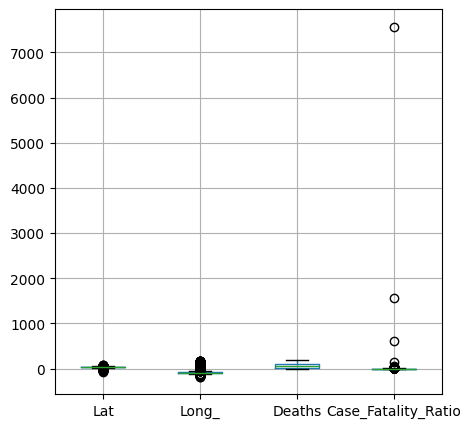

In [117]:
df.boxplot(figsize= (5,5))
plt.show()

<Axes: ylabel='Lat'>

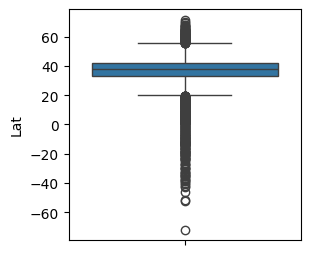

In [118]:
plt.figure(figsize=(3,3))
sns.boxplot(df['Lat'])

<Axes: ylabel='Long_'>

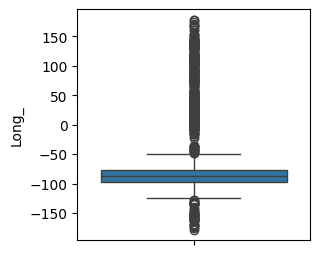

In [119]:
plt.figure(figsize=(3,3))
sns.boxplot(df['Long_'])

<Axes: ylabel='Deaths'>

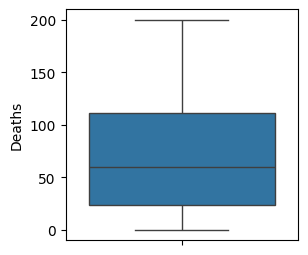

In [120]:
plt.figure(figsize=(3,3))
sns.boxplot(df['Deaths'])

<Axes: ylabel='Case_Fatality_Ratio'>

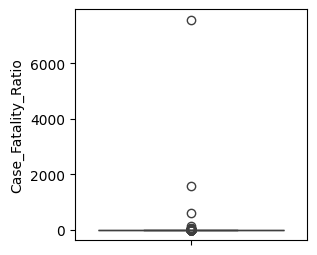

In [121]:
plt.figure(figsize=(3,3))
sns.boxplot(df['Case_Fatality_Ratio'])

In [122]:
from scipy.stats import skew

skewness = skew(df['Deaths'])
print('Skewness: ', skewness)

Skewness:  nan


In [123]:
q1 = df['Deaths'].quantile(0.25)
q3 = df['Deaths'].quantile(0.75)

iqr = q3- q1

In [124]:
lower_limit = q1- 1.5 * iqr
upper_limit = q3 +1.5 * iqr

df = df[(df['Deaths'] >= lower_limit) &
        (df['Deaths'] <= upper_limit)]

In [125]:
df.shape

(2458, 4)

In [126]:
# # Pair Plot
# plt.figure(figsize= (5,3))

# for i, col in  enumerate(num_cols, 1):
#     plt.subplot(2,3,i)
#     sns.histplot(data= df, x= col)
# plt.show()

<Axes: >

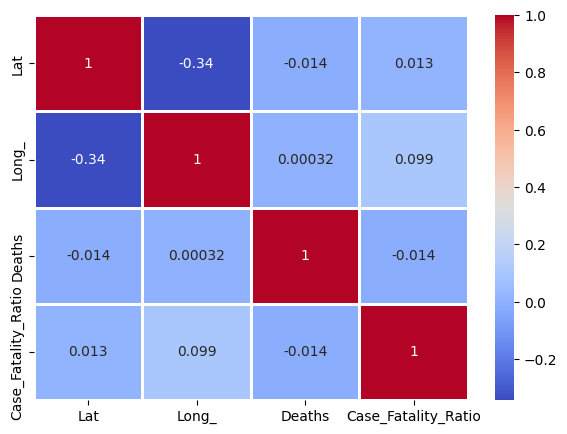

In [127]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= 'coolwarm', linewidths=2)

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
x= df.drop(['Case_Fatality_Ratio'], axis= 1)
y= df['Deaths']

In [130]:
# Splitting Data Into Train and test
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [131]:
cat_cols= X_train.select_dtypes(include= "O").columns.tolist()
num_cols= X_train.select_dtypes(exclude= "O").columns.tolist()

In [132]:
cat_cols

[]

In [133]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [134]:
# Column Transformation For the Numerical and categorical features
enc= OneHotEncoder(handle_unknown= 'ignore')
sc= StandardScaler()

ct= ColumnTransformer(
        [
            ('encoding', enc, cat_cols),
            ('scaling', sc, num_cols)
        ]
)

In [135]:
X_train= ct.fit_transform(X_train)
X_test = ct.transform(X_test)